In [16]:
import numpy as np
import matplotlib.pyplot as plt
from enhanced_hybrid_hhl import (ideal_preprocessing,
                                 Lee_preprocessing,
                                 QuantumLinearSystemProblem
)

In [17]:
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService()
torino = service.get_backend('ibm_torino')
simulator = AerSimulator().from_backend(torino)

In [18]:
eigenvalues = [0.3, 0.5, -0.66, -0.8]
A_matrix = np.diag(eigenvalues)
problem = QuantumLinearSystemProblem(A_matrix=A_matrix,
                                     b_vector=[1,0.6,1.2,0.9])

In [33]:
ideal_eigenvalues, ideal_projections = ideal_preprocessing(problem)

preprocessing = Lee_preprocessing(3,
                                  max_eigenvalue=0.8,
                                  backend = simulator)

estimate_eigenvalues, estimated_projections = preprocessing.estimate(problem)
print(estimate_eigenvalues, estimated_projections)

[-0.8, 0.26666666666666666, -0.5333333333333333] [0.335, 0.25075, 0.16975]


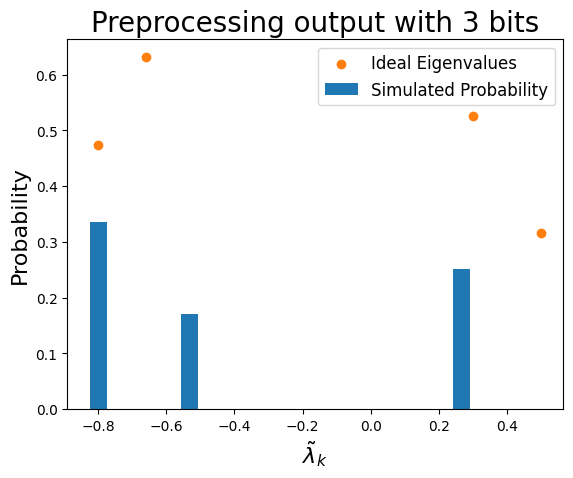

In [34]:
plt.bar(estimate_eigenvalues, estimated_projections, zorder=0, width=0.05, label='Simulated Probability')
plt.scatter(ideal_eigenvalues, ideal_projections, zorder=1, label = 'Ideal Eigenvalues')
plt.title('Preprocessing output with 3 bits', fontsize=20)
plt.xlabel(r'$\tilde{\lambda}_k$', fontsize=16)
plt.ylabel(r'Probability', fontsize=16)
plt.legend()
plt.savefig('3_bit_preprocessing.png', format='png')
plt.show()